# **Exploring Job Market Data Using Word Clouds and Waffle Charts**
Date: Oct 21, 2025

  *   Estimated time needed: 45-60 minutes
      *   Part 1 : Word Clouds: 10 minutes
      *   Part 2 : Waffle Charts: 15 minutes
      *   Part 3 : Data Insights: 30 minutes

# **Introduction**

This short lab uses a simulated dataset of Canadian job listings.
You’ll practice turning data into visuals that tell a story — first with Word Clouds (text frequency), then Waffle Charts (proportion). The goal is to gain quick insights about which jobs and provinces dominate hiring, and how company size and salary affect distribution.

# **Objectives**

    After completing this lab, you will be able to:
      *   Import and explore a CSV dataset using Pandas
      *   Pre-process and wrangle data for visualization
      *   Generate a << Word Cloud >> to visualize top job titles in Canada
      *   Create << Waffle Charts >> to represent proportional job distribution
      *   Apply grouping, aggregation, and filtering techniques for deeper insights
      *   Identify key job market patterns across provinces






# **Dataset Overview - Canada Statistic Demo**
> 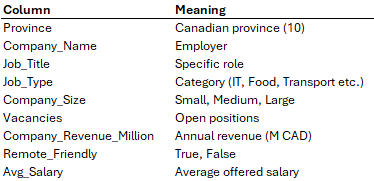

# **What story does your data tell you now?**

**1. Libraries**

In [ ]:
# Get the Time Stamp
from datetime import datetime
import pytz

def get_timestamp():
    local_tz = pytz.timezone("America/Halifax")  # Set timezone to Halifax
    local_time = datetime.now(local_tz)  # Get current Halifax time
    mytime = local_time.strftime("%Y-%m%d_%H:%M:%S")  # Create timestamp
    return mytime

In [ ]:
# ===============================
#  Libraries for this Lab
#  (Canada Job Statistics Demo)
# ===============================

# Data handling
import pandas as pd
import numpy as np
from IPython.display import display # Interactive / dynamic charts

# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import ipywidgets as widgets #create Interactive / dynamic charts (like dropdown menus, sliders, checkboxes, text boxes, etc)
%matplotlib inline
%pip install pywaffle

# Additional visualization tools
from wordcloud import WordCloud # create static wordclouds
from pywaffle import Waffle # create static waffle charts

# Statistics (optional, for correlation / insight charts)
from scipy import stats

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Optional
mpl.style.use('ggplot')  # Matplotlib style, ggplot-like theme
mytime = get_timestamp() # Time Stamp

print(f"\n\n| All Packages Ready")
print(f"| Matplotlib version: {mpl.__version__} (>= 2.0.0)")
print(f"| {mytime}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 61.4 MB/s eta 0:00:00


| All Packages Ready
| Matplotlib version: 3.10.0 (>= 2.0.0)
| 2025-1022_01:49:29


In [ ]:
url = 'https://raw.githubusercontent.com/dannypctang528/Data-Visualization/main/Canada_Statistic_Demo.csv'
df = pd.read_csv(url)

print("| Dataset loaded successfully!")
print(f"| Total rows: {df.shape[0]}, Total columns: {df.shape[1]}\n\n")
display(df.head())

| Dataset loaded successfully!
| Total rows: 79300, Total columns: 9




,Province,Company_Name,Job_Title,Job_Type,Company_Size,Vacancies,Company_Revenue_Million,Remote_Friendly,Avg_Salary
0,Ontario,ONT_Company_1,Software Developer,IT,Medium,15,47.95,True,109065.0
1,Ontario,ONT_Company_1,Data Analyst,IT,Medium,10,56.56,True,95871.0
2,Ontario,ONT_Company_1,IT Support Technician,IT,Medium,20,33.86,True,82902.0
3,Ontario,ONT_Company_1,Project Manager,IT,Medium,25,24.45,True,92376.0
4,Ontario,ONT_Company_1,Registered Nurse,Healthcare,Medium,4,27.91,True,90898.0


In [ ]:
# Optional \\ Data Verification \\ Check columns
print(df.columns)


Index(['Province', 'Company_Name', 'Job_Title', 'Job_Type', 'Company_Size',
       'Vacancies', 'Company_Revenue_Million', 'Remote_Friendly',
       'Avg_Salary'],
      dtype='object')


In [ ]:
# Optional \\ Data Verification \\ Check data types
print(df.dtypes)


Province                    object
Company_Name                object
Job_Title                   object
Job_Type                    object
Company_Size                object
Vacancies                    int64
Company_Revenue_Million    float64
Remote_Friendly               bool
Avg_Salary                 float64
dtype: object


In [ ]:
# Optional \\ Data Verification \\ Check data Statistic Summary
print(df.describe().round(2))


       Vacancies  Company_Revenue_Million  Avg_Salary
count   79300.00                 79300.00    79300.00
mean        7.93                    36.41    68674.17
std        17.37                    90.59    25864.24
min         0.00                     0.35    27095.00
25%         1.00                     2.26    46714.25
50%         2.00                     4.14    64370.00
75%         7.00                    25.73    87533.50
max       220.00                   644.29   144745.00


# **Part 1**

Assume there is none of abnormal data

In [ ]:
# Prepare the data for word clouds
# tips: To load 'Job_Title' into a list (named 'job_list') >> combine all job title into a string (named 'all_jobs')

# Create empty objects
job_list=[]
all_jobs=[]

# Combine all job titles into one string, separated by ','
job_list = df['Job_Title'].astype(str).tolist()
all_jobs = ",".join(job_list)

# Optional: Quick check
print(f"Total job titles combined: {len(all_jobs.split(","))}")
mytime = get_timestamp()
print(f"  | {mytime}")


Total job titles combined: 79300
  | 2025-1022_01:49:30


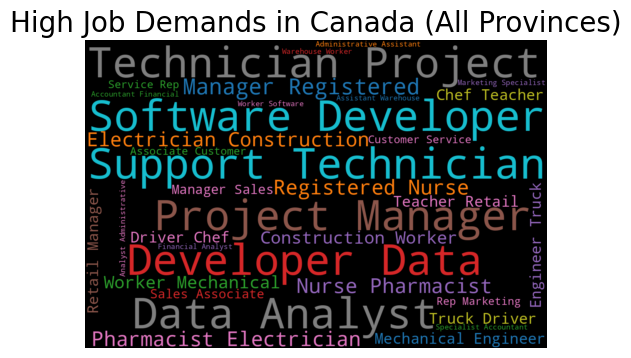

  | 2025-1022_01:49:31


In [ ]:
# Generate Word Cloud

wc_all = WordCloud(
    width=1200,
    height=800,
    background_color='Black',
    colormap='tab10',
    max_words=200
).generate(all_jobs)

plt.figure(figsize=(10,4))
plt.imshow(wc_all, interpolation='bilinear')
plt.axis('off')
plt.title('High Job Demands in Canada (All Provinces)', fontsize=20)
plt.show()


# Optional
mytime = get_timestamp()
print(f"  | {mytime}")

# Bonus:
# Colormap options: 'tab10','Set2','Accent','Paired','Dark2','viridis','plasma','cividis','magma','inferno','coolwarm','RdYlGn','PiYG'
# plt.imshow options: nearest,bilinear,bicubic,lanczos
# Word Clouds can be shaped as a circular....


Question: Which job titles appear most frequently?



---



# **Part 1 Bonus**
What is the Top Job Demands by Provinces?

In [ ]:
import ipywidgets as widgets

province_dropdown = widgets.Dropdown(
    options=sorted(df['Province'].unique()),
    description='Province:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='30%')
)

In [ ]:
def update_wordcloud(selected_province):
    # Filter dataset by province
    df_prov = df[df['Province'] == selected_province]

    # Combine job titles (weighted by vacancies for realism)
    text = " ".join(
        df_prov.loc[df_prov.index.repeat(df_prov['Vacancies'])]['Job_Title'].astype(str)
    )

    # Generate Word Clouds
    wc = WordCloud(
        background_color='white',
        colormap='Dark2',
        width=1000,
        height=600,
        max_words=1000
    ).generate(text)

    # Optional
    mytime = get_timestamp()
    #print(f"  | {mytime}")

    # Display
    plt.figure(figsize=(10,4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"High Job Demands in {selected_province} \n| {mytime} |", fontsize=20)
    plt.show()


In [ ]:
widgets.interact(update_wordcloud, selected_province=province_dropdown)


interactive(children=(Dropdown(description='Province:', layout=Layout(width='30%'), options=('Alberta', 'Briti…

<function __main__.update_wordcloud(selected_province)>

Question: Which job titles appear most frequently in your selected province?



---



# **Part 2**

Prepare Data for Waffle Chart
 1. Aggregate
 2. Group by 'Job_Type'
 3. Optional: Sort ascending

In [ ]:
# Aggregate and sort by total vacancies
df_jobtype = (
    df.groupby('Job_Type', as_index=False)['Vacancies']
    .sum()
    .sort_values(by='Vacancies', ascending=False)
)

# Convert to dictionary and normalization
data_dict = df_jobtype.set_index('Job_Type')['Vacancies'].to_dict()
total = sum(data_dict.values())
data_percent = {k: v / total * 100 for k, v in data_dict.items()}

# Create sorted labels (optional but helps alignment)
sorted_labels = [f"{k} ({v:.1f}%)" for k, v in data_percent.items()]


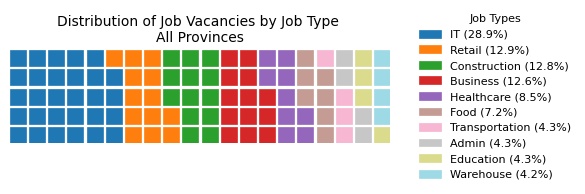

In [ ]:
# Convert colors to a list
colors_list = list(plt.cm.get_cmap('tab20', len(data_percent)).colors)

# Build Waffle Chart
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,  # 10x10 grid
    values=data_percent,
    labels=sorted_labels,
    legend={
        'loc': 'upper left',
        'bbox_to_anchor': (1.05, 1.5),
        'fontsize': 8,
        'ncol': 1,
        'frameon': False,
        'title': 'Job Types',
        'title_fontsize': 8,
        },
    colors=colors_list,  # Use the converted list of colors
    figsize=(6,5),
    title={'label': 'Distribution of Job Vacancies by Job Type \nAll Provinces',
           'loc': 'center',
           'fontsize': 10},
)

plt.show()

Question: How does job type distribution differ between provinces?

# **Part 2 Bonus Activity**
- Add an **interactive dropdown menu** for province selection.  
- Generate a **dynamic Waffle Chart** that updates automatically based on the user’s chosen province.  

In [ ]:
df.columns

Index(['Province', 'Company_Name', 'Job_Title', 'Job_Type', 'Company_Size',
       'Vacancies', 'Company_Revenue_Million', 'Remote_Friendly',
       'Avg_Salary'],
      dtype='object')

In [ ]:
# Create dropdown
province_options = sorted(df['Province'].unique().tolist()) # Replace 'xxxxxxxxxxx' by title '????'
province_options.insert(0, 'All Provinces')

province_dropdown = widgets.Dropdown(
    options=province_options,
    description='Select Province:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='30%')
)

In [ ]:
# Creat Waffle Chart based on Your Input

# importing the colormap module from Matplotlib
from matplotlib import cm

# Evaluating the Dropdown Box
def update_waffle(selected_province):
    # Filter or aggregate data
    if selected_province == 'All Provinces':
        df_filtered = df.copy()
    else:
        df_filtered = df[df['Province'] == selected_province]

    # Group by Job_Type
    df_jobtype = (
        df_filtered.groupby('Job_Type', as_index=False)['Vacancies']
        .sum()
        .sort_values(by='Vacancies', ascending=False)
    )

    # Prepare data
    data_dict = df_jobtype.set_index('Job_Type')['Vacancies'].to_dict()
    total = sum(data_dict.values())
    data_percent = {k: v / total * 100 for k, v in data_dict.items()}

    # Convert colormap to list of colors
    cmap = cm.get_cmap('tab20', len(data_percent))
    colors = [cmap(i) for i in range(len(data_percent))]

    # Plot waffle
    fig = plt.figure(
        FigureClass=Waffle,
        rows=5,
        values=data_percent,
        labels=[f"{k} ({v:.1f}%)" for k, v in data_percent.items()],
        legend={
            'loc': 'upper left',
            'bbox_to_anchor': (1.05, 1.5),
            'fontsize': 8,
            'ncol': 1,
            'frameon': False,
            'title': 'Job Types',
            'title_fontsize': 8,
        },
        colors=colors,
        figsize=(6, 5),
        block_arranging_style='column',
        title={
            'label': f"Job Type Distribution — {selected_province}",
            'loc': 'center',
            'fontsize': 10
        }
    )

    plt.show()



In [ ]:
# Join dropdown box & create chart
widgets.interact(update_waffle, selected_province=province_dropdown)


interactive(children=(Dropdown(description='Select Province:', layout=Layout(width='30%'), options=('All Provi…

<function __main__.update_waffle(selected_province)>




---




# **Part 3 — Discovering Insights**

In this section, you will:
- Transform categorical features such as **Company Size** and **Remote Friendly** into numeric values for analysis.  
- Use **grouping and aggregation** techniques to summarize key metrics by province and job type.  
- Explore **relationships and correlations** between variables such as revenue, vacancies, and salary using various charts.  
- Identify **hidden patterns** or **unexpected trends** within the job market data.  


In [ ]:
# Convert qualitative features to numeric codes
df['Company_Size_Num'] = df['Company_Size'].map({
    "Low": 1,     # < 50 employees
    "Medium": 2,    # 50–249 employees
    "High": 3      # ≥ 250 employees
})

df['Remote_Friendly_Num'] = df['Remote_Friendly'].map({
    False: 0,
    True: 1
})

# Verify conversion
df[['Company_Size', 'Company_Size_Num', 'Remote_Friendly', 'Remote_Friendly_Num']].head()


,Company_Size,Company_Size_Num,Remote_Friendly,Remote_Friendly_Num
0,Medium,2,True,1
1,Medium,2,True,1
2,Medium,2,True,1
3,Medium,2,True,1
4,Medium,2,True,1


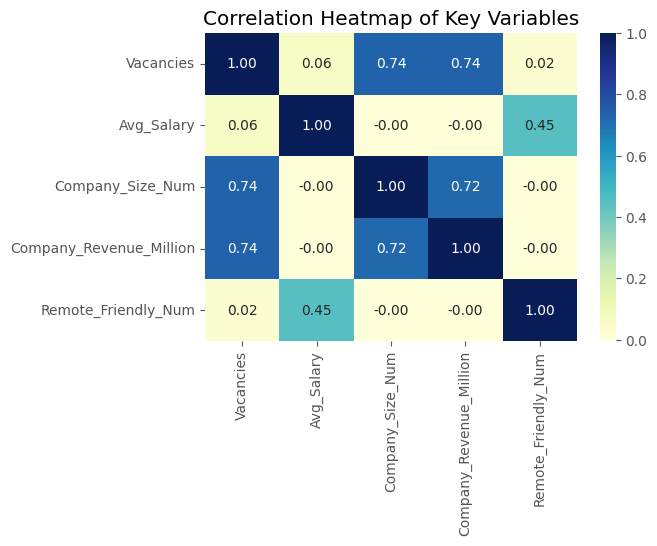

In [ ]:
# Create Heatmap
# To Check the correlation between variables

plt.figure(figsize=(6,4))
sns.heatmap(df[['Vacancies',
                'Avg_Salary',
                'Company_Size_Num',
                'Company_Revenue_Million',
                'Remote_Friendly_Num',
                ]].corr(),
            annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Heatmap of Key Variables')
plt.show()


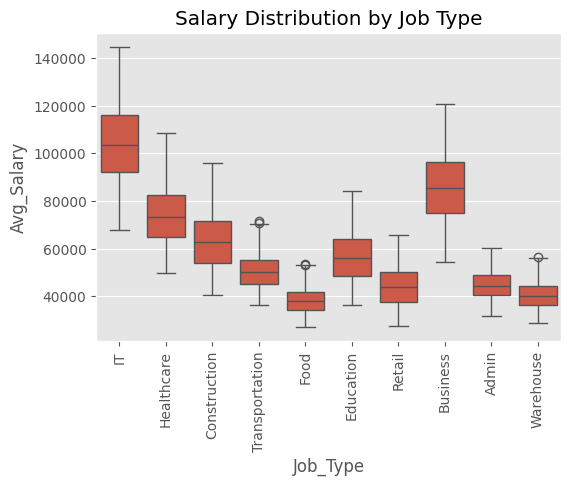

In [ ]:
# Create Boxplot
# To Compare the distribution by Job Type

plt.figure(figsize=(6,4))
sns.boxplot(x='Job_Type', y='Avg_Salary', data=df)
plt.xticks(rotation=90)
plt.title('Salary Distribution by Job Type')
plt.show()


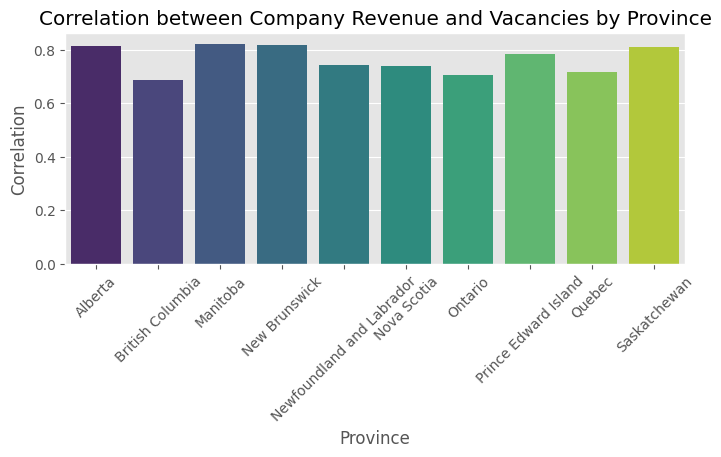

In [ ]:
# Compare the correlation value by Bar chart

corr_by_province = (
    df.groupby('Province')[['Company_Revenue_Million','Vacancies']]
    .corr()
    .iloc[0::2, -1]
    .reset_index()
    .rename(columns={'Vacancies': 'Correlation'})
)

# Create Bar Chart
plt.figure(figsize=(8,3))
sns.barplot(x='Province', y='Correlation', data=corr_by_province, palette='viridis')
plt.title('Correlation between Company Revenue and Vacancies by Province')
plt.xticks(rotation=45)
plt.show()


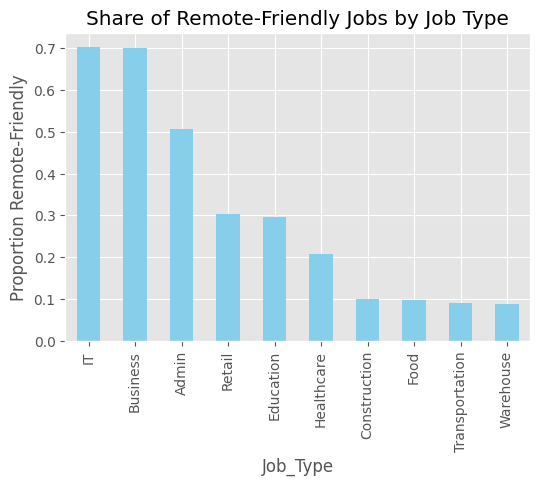

In [ ]:
# Compare the Work-From-Home by Job Type

remote_share = df.groupby('Job_Type')['Remote_Friendly_Num'].mean().sort_values(ascending=False)
remote_share.plot(kind='bar', color='skyblue', figsize=(6,4))
plt.ylabel('Proportion Remote-Friendly')
plt.title('Share of Remote-Friendly Jobs by Job Type')
plt.show()


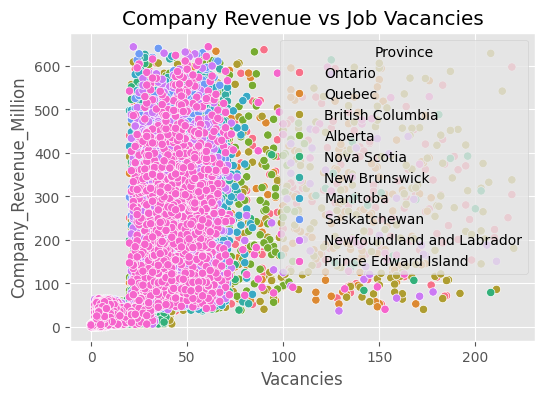

In [ ]:
# Create the scatter plot by Company Revenue vs Job Vacancies

plt.figure(figsize=(6,4))
sns.scatterplot(x='Vacancies', y='Company_Revenue_Million', hue='Province', data=df)
plt.title('Company Revenue vs Job Vacancies')
plt.show()


In [ ]:
# Replace string categories with numeric codes (if not yet applied)
#df['Company_Size_Num'] = df['Company_Size'].replace({'Low': 1, 'Medium': 2, 'High': 3})
#df['Remote_Friendly_Num'] = df['Remote_Friendly'].replace({False: 0, True: 1})

# Group and sum numeric columns
df_sum = (
    df.groupby(['Province', 'Job_Type'], as_index=False)
      .agg({
          'Vacancies': 'sum',
          'Company_Revenue_Million': 'sum',
          'Avg_Salary': 'sum',
          'Company_Size_Num': 'sum',
          'Remote_Friendly_Num': 'sum'
      })
)

# Rename for clarity
df_sum.rename(columns={
    'Vacancies': 'Vacancies_Total',
    'Company_Revenue_Million': 'Company_Revenue_Million_Total',
    'Avg_Salary': 'Avg_Salary_Total',
    'Company_Size_Num': 'Company_Size_Num_Total',
    'Remote_Friendly_Num': 'Remote_Friendly_Num_Total'
}, inplace=True)

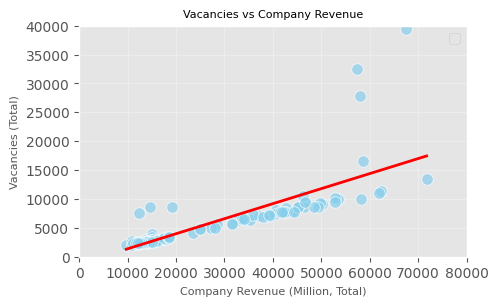

In [ ]:
# Create regression

plt.figure(figsize=(5,3))

# Scatter plot
sns.scatterplot(
    data=df_sum,
    x='Company_Revenue_Million_Total',
    y='Vacancies_Total',
    color='skyblue',
    s=70,
    alpha=0.7
)

# Polynomial regression (order 2)
sns.regplot(
    data=df_sum,
    x='Company_Revenue_Million_Total',
    y='Vacancies_Total',
    scatter=False,     # hide dots from regplot to avoid duplication
    order=1,           # quadratic regression
    color='red',
    ci=None,           # remove confidence interval
    line_kws={'lw':2, 'label':'2nd-Order Fit'}
)

plt.title('Vacancies vs Company Revenue', fontsize=8)
plt.xlabel('Company Revenue (Million, Total)', fontsize=8)
plt.ylabel('Vacancies (Total)', fontsize=8)
plt.xlim(0, 80000)
plt.ylim(0, 40000)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


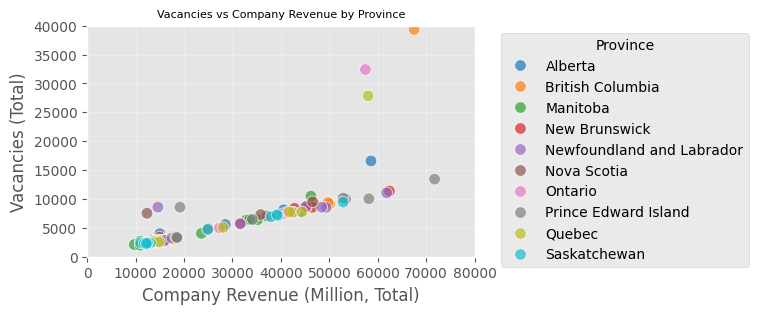

In [ ]:

plt.figure(figsize=(5,3))
sns.scatterplot(
    data=df_sum,
    x='Company_Revenue_Million_Total',
    y='Vacancies_Total',
    hue='Province',
    palette='tab10',
    s=70,
    alpha=0.7
)

plt.title('Vacancies vs Company Revenue by Province', fontsize=8)
plt.xlabel('Company Revenue (Million, Total)')
plt.ylabel('Vacancies (Total)')
plt.xlim(0, 80000)
plt.ylim(0, 40000)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Province')
plt.show()


In [ ]:
# Export dataframe to csv file
mytime = get_timestamp() # Time Stamp
df.to_csv(f"Canada_Statistic_Demo_Overall_{mytime}.csv", index=False)


# **Conclusion & Reflection**

Congratulations! You’ve completed the “Canada Job Market Visualization Lab”, where you:
*   Practiced data preprocessing and transformation (replacing, grouping, aggregating).
*   Created Word Clouds to visualize job title frequency across provinces.
*   Designed Waffle Charts to show job type proportions interactively.
*   Explored correlation and distribution using scatter plots and regression trends.
*   Learned how to identify hidden insights behind data patterns.



# **Questions for Deeper Thinking**

Encourage learners to reflect and discuss (either individually or in groups):

*   Which provinces consistently show high IT job demand — and why might that be?
*   How does company revenue influence hiring scale across different industries?
*   What do you notice about remote-friendly jobs and average salary trends?
*   In your waffle charts, are there provinces where certain job types dominate?
*   How would you redesign this visualization for a public employment report?
*   What other variables (education, gender, experience, etc.) could make this analysis more powerful?
*   If this dataset represented real data, what policy or business decisions could be made based on these insights?





---

1. Can you create the chart like this?
2. What is the insights if those 'Outliers' that is explanable?

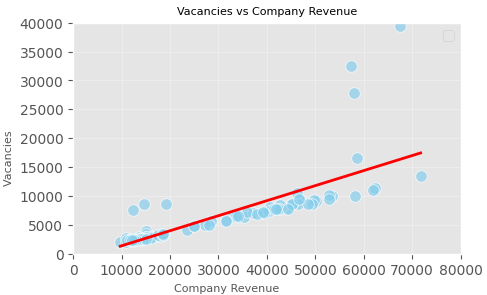